# SMAC/CRISTAL/ULille

Auteur : Philippe Mathieu, CRISTAL Lab, SMAC Team, University of Lille, email : philippe.mathieu@univ-lille.fr

Date : 13 march 2020

## Simulation of epidemics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from covid import *

In [2]:
couleur_a='#396AB1'
couleur_b='#DA7C30'
dpi=300
figsize = (10,5)

# Un modèle S-I-(G/R)-M

Les infectés se répartissent en Graves et Remis (somme de ces deux taux sensiblement équivalent aux remis de l'ancien modèle). Les Graves finissent soit Remis (taux) soit Morts (1-taux).

In [3]:
data_nat = collecte_donnees()
data_reg = collecte_donnees('regional')
data_dep = collecte_donnees('departemental')

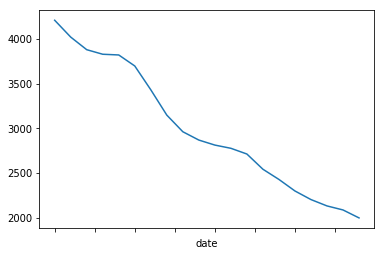

In [4]:
data_nat['reanimation'].tail(20).plot()

## Evaluation nationale

In [5]:
avant_confinement = data_nat.loc[:'2020-03-16'].shape[0]
renforcement = data_nat.loc[:'2020-03-24'].shape[0]
prolongement = data_nat.loc[:'2020-04-13'].shape[0]
deconfinement = data_nat.loc[:'2020-05-11'].shape[0]
aujourdhui = len(data_nat.index) - 1

In [6]:
I=np.array(data_nat['cas_confirmes']/67000000)
R=np.array(data_nat['gueris']/67000000)
G=np.array(data_nat['reanimation']/67000000)
M=np.array((data_nat['deces'])/67000000)
#M=np.array((data['deces'] + data['deces_ehpad'])/67000000)

S=[1]*len(data_nat.index) - I - G - R - M

data_objectif = np.array([S, I, G, R, M])

periodes_confinement = [avant_confinement, renforcement - avant_confinement, prolongement - renforcement, len(data_nat.index) - prolongement-1]

tauxInfecteInitial = 20 * data_nat['cas_confirmes'][0]/67000000 # Ici on peut modifier pour s'écarter du chiffre officiel initial

L'optimisation peut être lancée à l'aide de la commande suivante:

In [ ]:
#solution = optimisation_genetique(500, 1000, data_objectif, periodes_confinement, eval_SIGRM, nb_parametres=2)

Comparaison graphique :

In [ ]:
#compare_solution_SIGRM(solution, data_objectif, periodes_confinement)

## Solutions intéressantes

In [7]:
def scenario(listeTaux, category="G", label=None, linestyle='solid', color=couleur_b):
    tauxInfecteInitial = candidat[-5] 
    tauxGraves = candidat[-4]
    tauxRemis = candidat[-3]
    tauxRemisGraves = candidat[-2]
    tauxMortalite = candidat[-1]

    S=[1 - tauxInfecteInitial]
    I=[tauxInfecteInitial]
    G=[0.0]
    R=[0.0]
    M=[0.0]

    liste_taux = []
    i = 0
    for periode in periodes_confinement:
        liste_taux = liste_taux + [candidat[i]] * periode
        i += 1
    SIGRM_increment(S, I, G, R, M, liste_taux, tauxRemis, tauxGraves, tauxRemisGraves, tauxMortalite)
    SIGRM_increment(S, I, G, R, M, listeTaux, tauxRemis, tauxGraves, tauxRemisGraves, tauxMortalite)
    if category == "G":
        plt.plot(np.array(G)*67000000, label=label, color=color, linestyle=linestyle)
    if category == "M":
        plt.plot(np.array(M)*67000000, label=label, color=color, linestyle=linestyle)

### Proposition du 06/05

In [8]:
periodes_confinement = [avant_confinement, renforcement - avant_confinement, prolongement - renforcement, deconfinement - prolongement]

In [9]:
candidat=[0.275372335146436, 0.38676389057705435, 0.08906800372536995, 0.10045712354211243, 
          data_nat['cas_confirmes'][0]/67000000, 0.07, 0.07, 0.011445165643347396, 0.06942900452349375]
taux_intermediaire = (candidat[0] + candidat[3])/2

Evolution du R0 :

In [10]:
print(candidat[0] / (candidat[5] + candidat[6]))
print(candidat[1] / (candidat[5] + candidat[6]))
print(candidat[2] / (candidat[5] + candidat[6]))
print(candidat[3] / (candidat[5] + candidat[6]))

1.9669452510459713
2.762599218407531
0.6362000266097853
0.7175508824436602


In [11]:
tauxInfecteInitial = candidat[-5] 
tauxGraves = candidat[-4]
tauxRemis = candidat[-3]
tauxRemisGraves = candidat[-2]
tauxMortalite = candidat[-1]

S=[1 - tauxInfecteInitial]
I=[tauxInfecteInitial]
G=[0.0]
R=[0.0]
M=[0.0]

liste_taux = []
i = 0
for periode in periodes_confinement:
    liste_taux = liste_taux + [candidat[i]] * periode
    i += 1

In [12]:
SIGRM_increment(S, I, G, R, M, liste_taux, tauxRemis, tauxGraves, tauxRemisGraves, tauxMortalite)

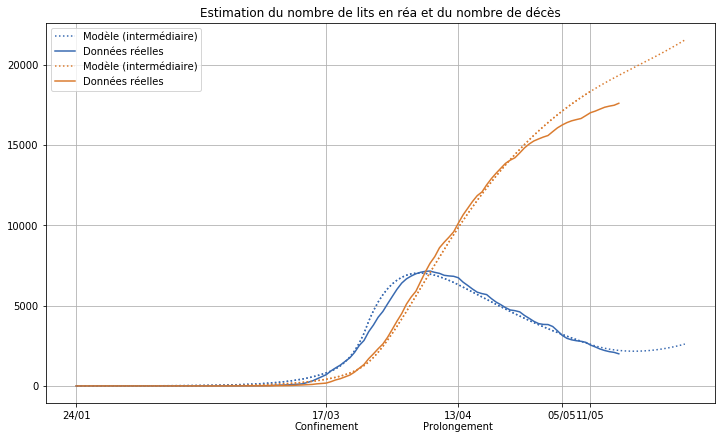

In [13]:
fig, ax = plt.subplots(figsize=(12,7))

plt.plot(np.array(G)*67000000, label="Modèle (intermédiaire)", color=couleur_a, linestyle=':')
plt.plot(data_objectif[2]*67000000, label="Données réelles", color=couleur_a)
plt.plot(np.array(M)*67000000, label="Modèle (intermédiaire)", color=couleur_b, linestyle=':')
plt.plot(data_objectif[4]*67000000, label="Données réelles", color=couleur_b)

# Après confinement
scenario([taux_intermediaire]*(aujourdhui - deconfinement+14), "G", 
         color=couleur_a, linestyle=':')
scenario([taux_intermediaire]*(aujourdhui - deconfinement+14), "M", color=couleur_b, linestyle=':')

plt.xticks([0, avant_confinement, prolongement, data_nat.loc[:'2020-05-05'].shape[0], deconfinement], 
           ('24/01', '17/03\nConfinement', '13/04\nProlongement', '05/05', '11/05'), rotation=0)

plt.title("Estimation du nombre de lits en réa et du nombre de décès")
plt.legend()
plt.grid()

In [ ]:
(R[-1] + I[-1] + G[-1] + M[-1]) *100

# Matrices d'âge

In [14]:
def SIGRM_age(S, I, G, R, M, matrice, population_vector, liste_tauxTransmiss, tauxRemis, tauxGraves, 
              tauxRemisGraves, tauxMortalite):

    for tauxTransmiss in liste_tauxTransmiss:

        nouveauxCas = tauxTransmiss*S[-1]*matrice.dot(I[-1]/population_vector)
        nouveauxInfectesRemis=tauxRemis*I[-1]
        nouveauxInfectesGraves=tauxGraves*I[-1]
        nouveauxGravesRemis=tauxRemisGraves*G[-1]
        nouveauxGravesMorts=tauxMortalite*G[-1]
        
        S = np.append(S, [S[-1]-nouveauxCas], axis=0) 
        I = np.append(I, [I[-1]+nouveauxCas-nouveauxInfectesRemis-nouveauxInfectesGraves], axis=0)
        G = np.append(G, [G[-1]+nouveauxInfectesGraves-nouveauxGravesMorts-nouveauxGravesRemis], axis=0)
        R = np.append(R, [R[-1]+nouveauxInfectesRemis+nouveauxGravesRemis], axis=0)
        M = np.append(M, [M[-1]+nouveauxGravesMorts], axis=0)
        #assert(round(S[-1]+I[-1]+G[-1]+R[-1]+M[-1],3) == 1) # la somme fait toujours 1
        
    return S, I, G, R, M

In [15]:
tauxInfecteInitial = np.array([0.001, 0.001])
tauxGraves = 0.05
tauxRemis = 0.1
tauxRemisGraves = 0.05
tauxMortalite = 0.05

matrice = np.array([[18, 9], [3, 12]])

repartition = np.array([0.25, 0.75])

population = 20000

population_vector = np.array([0.25, 0.75]) * population


S=[(1 - tauxInfecteInitial) * population_vector]
I=[tauxInfecteInitial * population_vector]
G=[tauxInfecteInitial*0]
R=[tauxInfecteInitial*0]
M=[tauxInfecteInitial*0]

liste_taux = [0.02]*200

In [16]:
S

[array([ 4995., 14985.])]

In [17]:
S, I, G, R, M = SIGRM_age(S, I, G, R, M, matrice*0.5, population_vector, liste_taux, tauxRemis, tauxGraves, tauxRemisGraves, tauxMortalite)

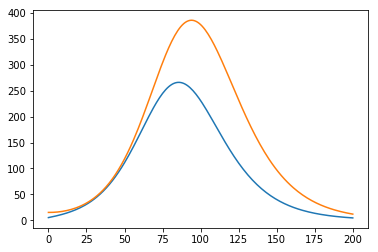

In [18]:
plt.plot(I)

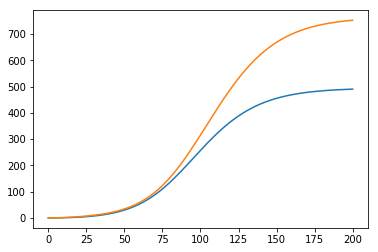

In [19]:
plt.plot(M)

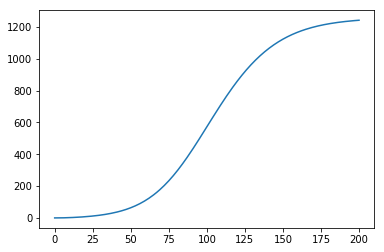

In [20]:
plt.plot(M[:,0] + M[:,1])

In [ ]:
plt.plot(R)

## Optimisation

In [163]:
def eval_SIGRM_age(candidat, data_objectif, periodes_confinement, population=1, plot=False):
    candidat = np.absolute(candidat)
    tauxInfecteInitial = candidat[-5]
    tauxGraves = candidat[-4]
    tauxRemis = candidat[-3]
    tauxRemisGraves = candidat[-2]
    tauxMortalite = candidat[-1]
    
    # Paramètres fixes
    tauxRemis = 0.08
    tauxGraves = 0.07
    tauxInfecteInitial = 400/67000000
    
    repartition = np.array([0.25, 0.75])
    matrice = np.array([repartition, repartition])
    population_vector = np.array([0.25, 0.75])

    tauxInfecteInitial = np.array([tauxInfecteInitial, tauxInfecteInitial])
    S=[(1 - tauxInfecteInitial) * population_vector]
    I=[tauxInfecteInitial * population_vector]
    G=[tauxInfecteInitial*0]
    R=[tauxInfecteInitial*0]
    M=[tauxInfecteInitial*0]

    liste_taux = []
    i = 0
    for periode in periodes_confinement:
        liste_taux = liste_taux + [candidat[i]/20] * periode
        i += 1

    S, I, G, R, M = SIGRM_age(S, I, G, R, M, matrice, population_vector, liste_taux, tauxRemis, tauxGraves, tauxRemisGraves, tauxMortalite)
    
    if plot:
        fig, ax = plt.subplots(figsize=(12,7))
        plt.plot(data_objectif[2]*67000000, label="Graves (données)")
        plt.plot(np.array(G[:,0] + G[:,1])*67000000, label="Graves (estimation")
        plt.plot(data_objectif[4]*67000000, label="Morts (données)")
        plt.plot(np.array(M[:,0] + M[:,1])*67000000, label="Morts (estimation)")
        plt.legend()
        plt.savefig(str(plot) +".jpg")

    return np.linalg.norm(np.array([G[:,0] + G[:,1],M[:,0] + M[:,1]] ) - np.array([data_objectif[2],data_objectif[4]]) ),

In [164]:
I=np.array(data_nat['cas_confirmes']/67000000)
R=np.array(data_nat['gueris']/67000000)
G=np.array(data_nat['reanimation']/67000000)
M=np.array((data_nat['deces'])/67000000)
#M=np.array((data['deces'] + data['deces_ehpad'])/67000000)

S=[1]*len(data_nat.index) - I - G - R - M

data_objectif = np.array([S, I, G, R, M])

tauxInfecteInitial = 20 * data_nat['cas_confirmes'][0]/67000000 # Ici on peut modifier pour s'écarter du chiffre officiel initial

periodes_confinement = [avant_confinement, renforcement - avant_confinement, prolongement - renforcement, deconfinement - prolongement, aujourdhui - deconfinement]

In [165]:
matrice

array([[18,  9],
       [ 3, 12]])

In [169]:
candidat = optimisation_genetique(1000, 200, data_objectif, periodes_confinement, eval_SIGRM_age, nb_parametres=len(periodes_confinement)+5, verbose=True)

gen	nevals	avg       	std        	min       	max       
0  	1000  	0.00148216	5.25409e-06	0.00146678	0.00149262
1  	571   	0.00147772	4.10349e-06	0.00146652	0.00148963
2  	626   	0.00147423	3.15541e-06	0.0014652 	0.00148553
3  	598   	0.00147173	2.4983e-06 	0.00146484	0.00148168
4  	568   	0.0014698 	2.10704e-06	0.00146453	0.00148269
5  	593   	0.00146825	1.6376e-06 	0.0014628 	0.00148494
6  	608   	0.00146715	1.53506e-06	0.00145607	0.00148579
7  	613   	0.00146621	1.46658e-06	0.00145419	0.0014783 
8  	582   	0.00146522	1.69741e-06	0.00145419	0.00147578
9  	631   	0.00146411	2.19227e-06	0.00145395	0.00147307
10 	579   	0.00146262	3.11407e-06	0.00144327	0.00147804
11 	614   	0.00146034	3.67796e-06	0.00144288	0.00147062
12 	613   	0.00145701	3.39819e-06	0.00144288	0.00147193
13 	572   	0.00145454	2.69279e-06	0.00144264	0.00147207
14 	574   	0.00145303	3.45601e-06	0.00141315	0.00146459
15 	612   	0.00145096	5.19352e-06	0.00141315	0.00146424
16 	652   	0.00144709	7.27803e-06	0.00139047	0.0

142	575   	0.000270743	0.000143554	0.000226249	0.00186461
143	596   	0.000266057	0.00013112 	0.000226249	0.00158956
144	559   	0.00026603 	0.000139971	0.000226249	0.00223952
145	580   	0.000266158	0.00015628 	0.000226247	0.00278793
146	603   	0.000271875	0.000163365	0.000226247	0.00244867
147	561   	0.000267524	0.000128182	0.000224121	0.00145816
148	595   	0.000270368	0.000196231	0.000226249	0.00482229
149	622   	0.000270614	0.000145872	0.000224655	0.00192821
150	594   	0.00026613 	0.000160419	0.000224653	0.00248233
151	602   	0.000256348	0.000155856	0.000224646	0.00393046
152	605   	0.000263386	0.000162467	0.000224096	0.00294834
153	633   	0.000260519	0.000113641	0.000223568	0.00124277
154	618   	0.00027315 	0.000175283	0.000217305	0.00260085
155	579   	0.000260306	0.000151091	0.00021677 	0.00195864
156	597   	0.000246522	0.000120525	0.00021677 	0.00189331
157	614   	0.000248264	0.000128845	0.000215509	0.00183356
158	593   	0.000252115	0.00013784 	0.000215333	0.00187754
159	598   	0.0

In [170]:
candidat

[3.864122997847816,
 5.3825638579143105,
 3.0407735185414504,
 1.1457104508506417,
 -1.486848751443453,
 1.0178447839247238,
 0.47053696957302404,
 1.1248537870503006,
 0.030446262467106334,
 -0.055105230651926594]

(0.0001938715459104658,)

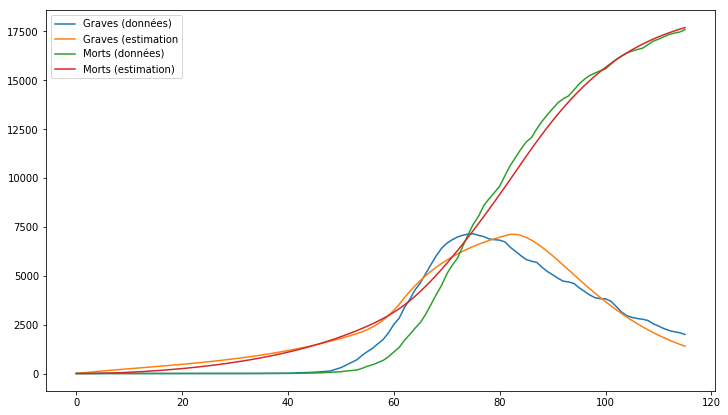

In [171]:
eval_SIGRM_age(candidat, data_objectif, periodes_confinement, plot='temp.jpg')

(2.069841301867642,)

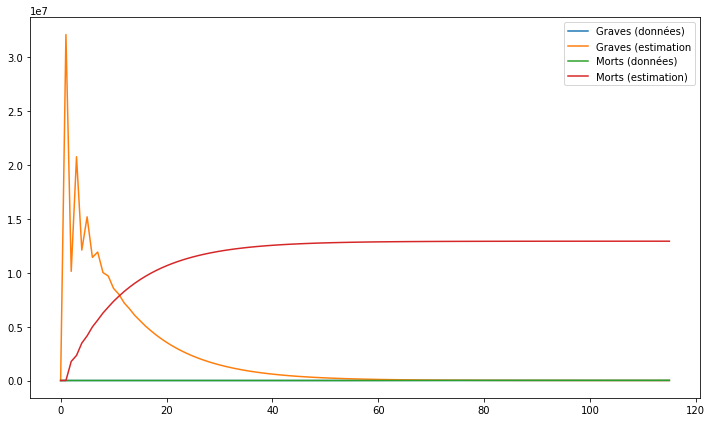

In [174]:
eval_SIGRM(candidat, data_objectif, periodes_confinement, plot='temp.jpg')

## Verification

In [116]:
periodes_confinement = [60]

In [117]:
candidat=[0.8, data_nat['cas_confirmes'][0]/67000000, 0.07, 0.07, 0.011445165643347396, 0.06942900452349375]

In [118]:
tauxInfecteInitial = candidat[-5] 
tauxGraves = candidat[-4]
tauxRemis = candidat[-3]
tauxRemisGraves = candidat[-2]
tauxMortalite = candidat[-1]

S=[1 - tauxInfecteInitial]
I=[tauxInfecteInitial]
G=[0.0]
R=[0.0]
M=[0.0]

liste_taux = []
i = 0
for periode in periodes_confinement:
    liste_taux = liste_taux + [candidat[i]] * periode
    i += 1

In [119]:
SIGRM_increment(S, I, G, R, M, liste_taux, tauxRemis, tauxGraves, tauxRemisGraves, tauxMortalite)

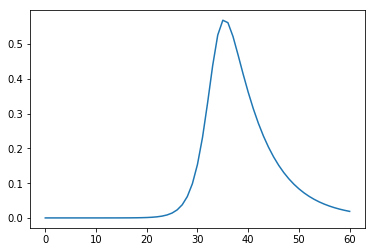

In [120]:
plt.plot(I)

In [151]:
candidat=[0.8/20.5, data_nat['cas_confirmes'][0]/67000000, 0.07, 0.07, 0.011445165643347396, 0.06942900452349375]

In [152]:
tauxInfecteInitial = candidat[-5] 
tauxGraves = candidat[-4]
tauxRemis = candidat[-3]
tauxRemisGraves = candidat[-2]
tauxMortalite = candidat[-1]

population_vector = np.array([0.25, 0.75])

In [153]:
tauxInfecteInitial = np.array([tauxInfecteInitial, tauxInfecteInitial])
S=[(1 - tauxInfecteInitial) * population_vector]
I2=[tauxInfecteInitial * population_vector]
G=[tauxInfecteInitial*0]
R=[tauxInfecteInitial*0]
M=[tauxInfecteInitial*0]

liste_taux = []
i = 0
for periode in periodes_confinement:
    liste_taux = liste_taux + [candidat[i]] * periode
    i += 1

In [154]:
S, I2, G, R, M = SIGRM_age(S, I2, G, R, M, matrice, population_vector, liste_taux, tauxRemis, tauxGraves, tauxRemisGraves, tauxMortalite)

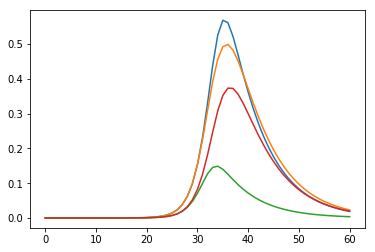

In [156]:
plt.plot(I)
plt.plot(I2[:,0] + I2[:,1])
plt.plot(I2[:,0])
plt.plot(I2[:,1])